# Step 2: Data Cleaning - Tidy up messy Datasets (Movies Dataset)

## First Steps 

1. __Loading__ and __inspecting__ the messy dataset __movies_metadata.csv__. Trying to Identify columns with nested / stringified json data.

In [124]:
import pandas as pd
import numpy as np

In [300]:
df = pd.read_csv('movies_metadata.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [185]:
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Dropping irrelevant Columns

2. __Dropping__ the irrelevant columns 'adult', 'imdb_id', 'original_title', 'video' and 'homepage'.

In [301]:
df.drop(columns = ['adult'], inplace = True)

In [302]:
df.drop(columns = ['imdb_id', 'original_title', 'video','homepage'], inplace = True)

## How to handle stringified JSON columns

3. __Evaluating__ Python Expressions in the stringified columns ["belongs_to_collection", "genres", "production_countries", "production_companies", "spoken_languages"] and __removing quotes__ ("") where possible.

In [165]:
import json
import ast 


In [188]:
json_col = ["belongs_to_collection", "genres", "production_countries", 
            "production_companies", "spoken_languages"]

In [303]:
df.belongs_to_collection

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45466, dtype: object

In [168]:
json2 = '{"dog":3, "cat":5}'

In [169]:
json.loads(json2)

{'dog': 3, 'cat': 5}

In [170]:
df.loc[:,json_col ]

,belongs_to_collection,genres,production_countries,production_companies,spoken_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_639_1': 'en', 'name': 'English'}]"
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_639_1': 'en', 'name': 'English'}]"
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...,...
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[{'iso_3166_1': 'IR', 'name': 'Iran'}]",[],"[{'iso_639_1': 'fa', 'name': 'فارسی'}]"
45462,NaN,"[{'id': 18, 'name': 'Drama'}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]","[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_639_1': 'tl', 'name': ''}]"
45463,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_639_1': 'en', 'name': 'English'}]"
45464,NaN,[],"[{'iso_3166_1': 'RU', 'name': 'Russia'}]","[{'name': 'Yermoliev', 'id': 88753}]",[]


In [191]:
df.belongs_to_collection

0        {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                      NaN
2        {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                      NaN
4        {'id': 96871, 'name': 'Father of the Bride Col...
                               ...                        
45461                                                  NaN
45462                                                  NaN
45463                                                  NaN
45464                                                  NaN
45465                                                  NaN
Name: belongs_to_collection, Length: 45466, dtype: object

In [228]:
df.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [304]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: ast.literal_eval(x)\
                                                          if isinstance(x, str) else np.nan)

In [305]:
df.spoken_languages = df.spoken_languages.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [306]:
df.genres = df.genres.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else np.nan)

In [307]:
df.production_countries = df.production_countries.apply(lambda x: ast.literal_eval(x)\
                                                        if isinstance(x, str) else np.nan)

In [308]:
df.production_companies = df.production_companies.apply(lambda x: ast.literal_eval(x)\
                                                        if isinstance(x, str) else np.nan)

## How to flatten nested Columns

4. __Extracting__ only the __collection name__ from the column "belongs_to_collection" and __overwrite__ "belongs_to_collection". <br> For example: The value in the first row (Toy Story) should be 'Toy Story Collection'.

In [218]:
df.belongs_to_collection[0]

{'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',
 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}

In [309]:
df.belongs_to_collection = df.belongs_to_collection.apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)

In [310]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45461                               NaN
45462                               NaN
45463                               NaN
45464                               NaN
45465                               NaN
Name: belongs_to_collection, Length: 45466, dtype: object

In [221]:
df.belongs_to_collection.value_counts(dropna = False)


NaN                              40975
The Bowery Boys                     29
Totò Collection                     27
James Bond Collection               26
Zatôichi: The Blind Swordsman       26
                                 ...  
Glass Tiger collection               1
Kathleen Madigan Collection          1
The Big Bottom Box                   1
Joséphine - Saga                     1
Red Lotus Collection                 1
Name: belongs_to_collection, Length: 1696, dtype: int64

5. __Extracting__ all __genre names__ from the column "genres" and __overwrite__ "genres". If a movie has more than one genre: __seperating genres by a pipe__ "|".<br>
For example: The value in the first row (Toy Story) will be 'Animation|Comedy|Family'.

In [222]:
df.genres 

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [311]:
df.genres = df.genres.apply(lambda x: "|".join(i['name'] for i in x))

In [312]:
df.genres.value_counts(dropna=False)

Drama                              5000
Comedy                             3621
Documentary                        2723
                                   2442
Drama|Romance                      1301
                                   ... 
Action|Drama|Comedy|Documentary       1
War|Drama|History|Thriller            1
Horror|Drama|History|Thriller         1
Comedy|Crime|Action|Drama             1
Family|Animation|Romance|Comedy       1
Name: genres, Length: 4069, dtype: int64

In [313]:
df.genres.replace("",np.nan, inplace = True)

In [314]:
df.genres.value_counts(dropna=False)

Drama                              5000
Comedy                             3621
Documentary                        2723
NaN                                2442
Drama|Romance                      1301
                                   ... 
Action|Drama|Comedy|Documentary       1
War|Drama|History|Thriller            1
Horror|Drama|History|Thriller         1
Comedy|Crime|Action|Drama             1
Family|Animation|Romance|Comedy       1
Name: genres, Length: 4069, dtype: int64

6. __Extracting__ all __spoken language names__ from the column "spoken_languages" and __overwriting__ "spoken_languages". If a movie has more than one spoken language, __seperating spoken languages by a pipe__ "|".<br>
For example: The value in the first row (Toy Story) will be 'English'.

In [315]:
df.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45461               [{'iso_639_1': 'fa', 'name': 'فارسی'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45466, dtype: object

In [316]:
df.spoken_languages = df.spoken_languages.apply(lambda x: "|".join(i['name'] for i in x)\
                                                if isinstance(x, list) else np.nan) 

In [317]:
df.spoken_languages.value_counts(dropna = False)

English                           22395
                                   3952
Français                           1853
日本語                                1289
Italiano                           1218
                                  ...  
English|日本語|Latin                     1
Deutsch||ελληνικά|English             1
English|suomi|Deutsch|svenska         1
English|Français|Deutsch|فارسی        1
Fulfulde|English                      1
Name: spoken_languages, Length: 1843, dtype: int64

In [318]:
df.spoken_languages.replace("",np.nan, inplace = True)

In [319]:
df.spoken_languages.value_counts(dropna = False)

English                           22395
NaN                                3958
Français                           1853
日本語                                1289
Italiano                           1218
                                  ...  
Deutsch||ελληνικά|English             1
English|suomi|Deutsch|svenska         1
English|Français|Deutsch|فارسی        1
svenska|English|Español               1
Fulfulde|English                      1
Name: spoken_languages, Length: 1842, dtype: int64

7. __Extracting__ all __production countries names__ from the column "production_countries" and __overwriting__ "production_countries". If a movie has more than one production country, __seperating production countries by a pipe__ "|".<br>
For example: The value in the first row (Toy Story) should be 'United States of America'.

In [320]:
df.production_countries = df.production_countries.apply(lambda x: "|".join(i['name'] for i in x)\
                                                        if isinstance(x,list) else np.nan)

In [321]:
df.production_countries.value_counts(dropna = False)

United States of America                  17851
                                           6282
United Kingdom                             2238
France                                     1654
Japan                                      1356
                                          ...  
Romania|United Kingdom|Canada                 1
Finland|Germany|Netherlands                   1
France|Denmark|Spain|Sweden                   1
France|United States of America|Canada        1
Egypt|Italy|United States of America          1
Name: production_countries, Length: 2391, dtype: int64

In [322]:
df.production_countries.replace("",np.nan, inplace = True)

In [323]:
df.production_countries.value_counts(dropna = False)

United States of America                  17851
NaN                                        6288
United Kingdom                             2238
France                                     1654
Japan                                      1356
                                          ...  
Romania|United Kingdom|Canada                 1
Finland|Germany|Netherlands                   1
France|Denmark|Spain|Sweden                   1
France|United States of America|Canada        1
Egypt|Italy|United States of America          1
Name: production_countries, Length: 2390, dtype: int64

8. __Extracting__ all __production companies names__ from the column "production_companies" and __overwriting__ "production_companies". If a movie has more than one production company, I am __seperating production companies by a pipe__ "|".<br>
For example: The value in the first row (Toy Story) will be 'Pixar Animation Studios'

In [324]:
df.production_companies = df.production_companies.apply(lambda x: "|".join(i['name'] for i in x)\
                                                        if isinstance(x,list) else np.nan)

In [325]:
df.production_countries

0        United States of America
1        United States of America
2        United States of America
3        United States of America
4        United States of America
                   ...           
45461                        Iran
45462                 Philippines
45463    United States of America
45464                      Russia
45465              United Kingdom
Name: production_countries, Length: 45466, dtype: object

9. __Inspecting__ all columns above with value_counts(). Do you see anything strange?

In [326]:
df.isna().sum()


belongs_to_collection    40975
budget                       0
genres                    2442
id                           0
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies         6
production_countries      6288
release_date                87
revenue                      6
runtime                    263
spoken_languages          3958
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64

## Cleaning Numerical Columns

10. __Converting__ the datatype in the columns __"budget"__, __"id"__ and __"popularity"__ __to numeric__. __Setting__ invalid values as NaN.

In [327]:
df.dtypes

belongs_to_collection     object
budget                    object
genres                    object
id                        object
original_language         object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
dtype: object

In [328]:
df.budget = pd.to_numeric(df.budget, errors = 'coerce')

In [329]:
df.budget.value_counts(dropna = False)

0.0           36573
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
9750000.0         1
7275000.0         1
78146652.0        1
280.0             1
1254040.0         1
Name: budget, Length: 1224, dtype: int64

11. __Analyzing__ the columns __"budget"__ and __"revenue"__ and __"runtime"__. __Analyzing__ movies with a budget/revenue/runtime of 0.


In [335]:
df.budget = df.budget.replace(0, np.nan)


AttributeError: 'DataFrame' object has no attribute 'budget'

In [ ]:
df.revenue_musd = df.revenue_musd.replace(0, np.nan)

In [339]:
df.runtime = df.runtime.replace(0, np.nan)

12. The columns "budget" and "revenue" shall show values in Million USD. __Redefining__ these columns.

In [331]:
df.budget = df.budget.div(1000000)

In [332]:
df.revenue = df.revenue.div(1000000)

In [333]:
df.rename(columns = {'budget':'budget_musd','revenue':'revenue_musd'}, inplace = True)

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget_musd            8890 non-null   float64
 2   genres                 43024 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   poster_path            45080 non-null  object 
 8   production_companies   45460 non-null  object 
 9   production_countries   39178 non-null  object 
 10  release_date           45379 non-null  object 
 11  revenue_musd           7408 non-null   float64
 12  runtime                45203 non-null  float64
 13  spoken_languages       41508 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

13. __Analyzing__ popularity column and movies with a __vote_count of 0__. What´s the __vote_average__ for those movies?

In [ ]:
df.id = pd.to_numeric(df.id, errors = 'coerce')

In [ ]:
df.popularity = pd.to_numeric(df.popularity, errors = 'coerce')

In [351]:
df.popularity.value_counts(dropna = False)

0.000000    66
0.000001    56
0.000308    43
0.000220    40
0.000844    38
            ..
4.762242     1
6.173752     1
0.645652     1
0.556292     1
0.163015     1
Name: popularity, Length: 43758, dtype: int64

In [352]:
df.vote_count.value_counts(dropna = False)

1.0       3264
2.0       3132
0.0       2899
3.0       2787
4.0       2480
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: vote_count, Length: 1821, dtype: int64

In [353]:
df.vote_average.value_counts(dropna = False).head(20)

0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
6.3    1603
5.5    1381
5.8    1369
6.4    1350
6.7    1342
6.8    1324
6.1    1281
6.6    1263
6.2    1253
5.9    1196
5.3    1082
5.7    1046
6.9    1037
5.6    1006
7.3    1000
Name: vote_average, dtype: int64

In [354]:
df.loc[df.vote_count == 0, "vote_average"]

83       0.0
107      0.0
126      0.0
132      0.0
137      0.0
        ... 
45432    0.0
45434    0.0
45452    0.0
45464    0.0
45465    0.0
Name: vote_average, Length: 2899, dtype: float64

In [355]:
df.loc[df.vote_count == 0, "vote_average"] = np.nan


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget_musd            8890 non-null   float64
 2   genres                 43024 non-null  object 
 3   id                     45463 non-null  float64
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45460 non-null  float64
 7   poster_path            45080 non-null  object 
 8   production_companies   45460 non-null  object 
 9   production_countries   39178 non-null  object 
 10  release_date           45379 non-null  object 
 11  revenue_musd           7408 non-null   float64
 12  runtime                43645 non-null  float64
 13  spoken_languages       41508 non-null  object 
 14  status                 45379 non-null  object 
 15  ta

## Cleaning DateTime Columns

14. __Converting__ the datatype in the column __"release_date"__ __to datetime__. __Setting__ invalid values as NaN.

In [359]:
df.dtypes

belongs_to_collection     object
budget_musd              float64
genres                    object
id                       float64
original_language         object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue_musd             float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
dtype: object

In [363]:
df.release_date = pd.to_datetime(df.release_date, errors = 'coerce')

<AxesSubplot:>

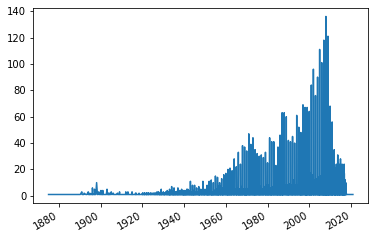

In [367]:
df.release_date.value_counts(dropna= False).plot()

## Cleaning Text / String Columns

15. __Analyzing__ the text columns "overview" and "tagline". __Trying__ to identify __missing data that is not represented by NaN__ (e.g. "No Data"). __Replacing as NaN__ (np.nan)!


In [370]:
df.original_language.value_counts(dropna = False).head(20)

en    32269
fr     2438
it     1529
ja     1350
de     1080
es      994
ru      826
hi      508
ko      444
zh      409
sv      384
pt      316
cn      313
fi      297
nl      248
da      225
pl      219
tr      150
cs      130
el      113
Name: original_language, dtype: int64

In [372]:
df.title.value_counts(dropna = False).head(20)

Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
Treasure Island          7
A Christmas Carol        7
The Three Musketeers     7
Blackout                 7
Home                     6
Macbeth                  6
The Journey              6
The Hunters              6
The Forest               6
Mother                   6
Countdown                6
Love                     6
The Stranger             6
Heidi                    6
Bluebeard                6
Name: title, dtype: int64

In [374]:
df.overview[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [375]:
df.overview.value_counts(dropna = False).head(20)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              954
No overview found.                                                                                                                                                 

In [376]:
df.overview.replace("No overview found.", np.nan, inplace = True)

In [377]:
df.overview.replace("No Overview", np.nan, inplace = True)

In [378]:
df.overview.replace("No movie overview available.", np.nan, inplace = True)

In [379]:
df.overview.replace(" ", np.nan, inplace = True)

In [380]:
df.overview.replace("No overview yet.", np.nan, inplace = True)

In [382]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [384]:
df.tagline.value_counts().head(20)

Based on a true story.                                        7
Be careful what you wish for.                                 4
Trust no one.                                                 4
-                                                             4
Classic Albums                                                3
Which one is the first to return - memory or the murderer?    3
Who is John Galt?                                             3
Some doors should never be opened.                            3
There is no turning back                                      3
Documentary                                                   3
How far would you go?                                         3
The end is near.                                              3
A Love Story                                                  3
Drama                                                         3
Know Your Enemy                                               3
There are two sides to every love story.

In [385]:
df.tagline.replace('-', np.nan, inplace = True)

In [386]:
df.tagline.value_counts().head(20)

Based on a true story.                                        7
Trust no one.                                                 4
Be careful what you wish for.                                 4
Know Your Enemy                                               3
Who is John Galt?                                             3
How far would you go?                                         3
Which one is the first to return - memory or the murderer?    3
Classic Albums                                                3
Drama                                                         3
Some doors should never be opened.                            3
A Love Story                                                  3
The end is near.                                              3
There is no turning back                                      3
There are two sides to every love story.                      3
Documentary                                                   3
Love is a force of nature.              

## Removing Duplicates

16. __Identifying__ and __removing__ duplicates!

In [396]:
df[df.duplicated(keep =  False)].sort_values("id")

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
7345,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
9165,NaN,NaN,Crime|Drama|Thriller,5511.0,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,Fida cinematografica|Compagnie Industrielle et...,France|Italy,1967-10-25,0.039481,105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,7.9,187.0
24844,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,NaN,85.0,English,Released,NaN,Deal,5.2,22.0
14012,NaN,NaN,Comedy|Drama,11115.0,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaBqrrozaG7rj6GJg3sUCiM29B.jpg,Andertainment Group|Crescent City Pictures|Tag...,United States of America,2008-01-29,NaN,85.0,English,Released,NaN,Deal,5.2,22.0
22151,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,,United States of America,2007-01-01,NaN,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
14000,NaN,NaN,Action|Horror|Science Fiction,18440.0,en,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,,United States of America,2007-01-01,NaN,89.0,English,Released,NaN,Days of Darkness,5.0,5.0
8068,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,NaN,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
9327,NaN,NaN,Adventure|Animation|Drama|Action|Foreign,23305.0,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,Filmfour,France|Germany|India|United Kingdom,2001-09-23,NaN,86.0,हिन्दी,Released,NaN,The Warrior,6.3,15.0
17229,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,,Sweden|Denmark,2009-10-21,NaN,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0
23044,NaN,NaN,Drama,25541.0,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,,Sweden|Denmark,2009-10-21,NaN,90.0,Dansk,Released,NaN,Brotherhood,7.1,21.0


In [397]:
df.drop_duplicates(keep = 'first')

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,Toy Story Collection,30.0,Animation|Comedy|Family,862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,United States of America,1995-10-30,373.554033,81.0,English,Released,NaN,Toy Story,7.7,5415.0
1,NaN,65.0,Adventure|Fantasy|Family,8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,1995-12-15,262.797249,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,Grumpy Old Men Collection,NaN,Romance|Comedy,15602.0,en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,United States of America,1995-12-22,NaN,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16.0,Comedy|Drama|Romance,31357.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81.452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,Father of the Bride Collection,NaN,Comedy,11862.0,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Sandollar Productions|Touchstone Pictures,United States of America,1995-02-10,76.578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,Drama|Family,439050.0,fa,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,,Iran,NaT,NaN,90.0,فارسی,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,NaN,NaN,Drama,111109.0,tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,Sine Olivia,Philippines,2011-11-17,NaN,360.0,NaN,Released,NaN,Century of Birthing,9.0,3.0
45463,NaN,NaN,Action|Drama|Thriller,67758.0,en,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,American World Pictures,United States of America,2003-08-01,NaN,90.0,English,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,NaN,NaN,NaN,227506.0,en,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,Yermoliev,Russia,1917-10-21,NaN,87.0,NaN,Released,NaN,Satan Triumphant,NaN,0.0


In [398]:
df.drop_duplicates(subset = "id", inplace = True)

In [400]:
df.id.value_counts(dropna = False)

862.0       1
74458.0     1
296206.0    1
107308.0    1
16247.0     1
           ..
44399.0     1
10138.0     1
32084.0     1
42191.0     1
461257.0    1
Name: id, Length: 45434, dtype: int64

## Handling Missing Values & Removing Observations

17. __Dropping__ all rows/movies with unknown __id__ or __title__.

In [401]:
df.isna().sum()

belongs_to_collection    40946
budget_musd              36554
genres                    2442
id                           1
original_language           11
overview                  1104
popularity                   4
poster_path                386
production_companies         4
production_countries      6283
release_date                88
revenue_musd             38036
runtime                   1819
spoken_languages          3954
status                      85
tagline                  25037
title                        4
vote_average              2900
vote_count                   4
dtype: int64

In [405]:
df.isna().sum()

belongs_to_collection    40946
budget_musd              36554
genres                    2442
id                           1
original_language           11
overview                  1104
popularity                   4
poster_path                386
production_companies         4
production_countries      6283
release_date                88
revenue_musd             38036
runtime                   1819
spoken_languages          3954
status                      85
tagline                  25037
title                        4
vote_average              2900
vote_count                   4
dtype: int64

In [406]:
df[df.id.isna()]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19730,NaN,NaN,Carousel Productions|Vision View Entertainment...,NaN,104.0,Released,NaN,Midnight Man,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


18. __Keeping__ only those rows/movies in the df with __10 or more non-NaN__ values.

In [407]:
df[df.title.isna()]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
19729,NaN,NaN,Action|Thriller|Drama,82663.0,en,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,NaN,NaN,Carousel Productions|Vision View Entertainment...,NaN,104.0,Released,NaN,Midnight Man,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,Mardock Scramble Collection,NaN,Animation|Science Fiction,122662.0,ja,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,NaN,NaN,TV Movie|Action|Horror|Science Fiction,249260.0,en,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
df.dropna(subset = ['id', 'title'], inplace = True)

In [409]:
df.isna().sum()

belongs_to_collection    40943
budget_musd              36550
genres                    2442
id                           0
original_language           11
overview                  1104
popularity                   0
poster_path                383
production_companies         0
production_countries      6279
release_date                84
revenue_musd             38032
runtime                   1815
spoken_languages          3950
status                      81
tagline                  25033
title                        0
vote_average              2896
vote_count                   0
dtype: int64

In [410]:
df.id = df.id.astype('int')

In [411]:
df.dtypes

belongs_to_collection            object
budget_musd                     float64
genres                           object
id                                int64
original_language                object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue_musd                    float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
vote_average                    float64
vote_count                      float64
dtype: object

In [412]:
df.notna().sum(axis = 1).value_counts().sort_values(ascending = False)

15    14754
16    12629
17     4533
14     4266
18     3937
13     2213
19     1133
12     1107
11      539
10      190
9       105
8        20
7         4
dtype: int64

In [416]:
df[df.notna().sum(axis = 1) == 7]

,belongs_to_collection,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue_musd,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,Toy Story Collection,30.0,Animation|Comedy|Family,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,United States of America,1995-10-30,373.554033,81.0,English,Released,NaN,Toy Story,7.7,5415.0
1,NaN,65.0,Adventure|Fantasy|Family,8844,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,1995-12-15,262.797249,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,Grumpy Old Men Collection,NaN,Romance|Comedy,15602,en,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,Warner Bros.|Lancaster Gate,United States of America,1995-12-22,NaN,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,NaN,16.0,Comedy|Drama|Romance,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81.452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,Father of the Bride Collection,NaN,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,Sandollar Productions|Touchstone Pictures,United States of America,1995-02-10,76.578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,Drama|Family,439050,fa,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,,Iran,NaT,NaN,90.0,فارسی,Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,NaN,NaN,Drama,111109,tl,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,Sine Olivia,Philippines,2011-11-17,NaN,360.0,NaN,Released,NaN,Century of Birthing,9.0,3.0
45463,NaN,NaN,Action|Drama|Thriller,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,American World Pictures,United States of America,2003-08-01,NaN,90.0,English,Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,NaN,NaN,NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,Yermoliev,Russia,1917-10-21,NaN,87.0,NaN,Released,NaN,Satan Triumphant,NaN,0.0


## Final Cleaning Steps

19. __Keeping__ only those rows/movies in the df with __status "Released"__. Then __dropping__ the column "status".

In [420]:
df.status.value_counts(normalize = True, dropna= False).mul(100)

Released           99.020471
Rumored             0.504072
Post Production     0.215716
NaN                 0.178296
In Production       0.044024
Planned             0.033018
Canceled            0.004402
Name: status, dtype: float64

In [422]:
df = df[df.status == 'Released'].copy()

In [423]:
df.drop(columns= ['status'], inplace = True)

20. The Order of the columns should be as follows: 

In [429]:
cols = ["id", "title", "tagline", "release_date", "genres", "belongs_to_collection", 
"original_language", "budget_musd", "revenue_musd", "production_companies",
"production_countries", "vote_count", "vote_average", "popularity", "runtime",
"overview", "spoken_languages", "poster_path"]

In [434]:
df = df.loc[:, cols]

21. __Resetting__ the Index and create a __RangeIndex__.

In [435]:
df.reset_index(drop = True, inplace = True)

In [436]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,United States of America,5415.0,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.0,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.0,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,United States of America,34.0,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,United States of America,173.0,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,/e64sOI48hQXyru7naBFyssKFxVd.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44980,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,,Iran,1.0,4.0,0.072051,90.0,Rising and falling between a man and woman.,فارسی,/jldsYflnId4tTWPx8es3uzsB1I8.jpg
44981,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,Philippines,3.0,9.0,0.178241,360.0,An artist struggles to finish his work while a...,NaN,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
44982,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,United States of America,6.0,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",English,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
44983,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,Russia,0.0,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",NaN,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg


__Correcting__ the poster pasth.

In [437]:
df.poster_path[0]

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [438]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df.poster_path = "<img src='" + base_poster_url + df.poster_path + "' style='height:100px;'>"

In [439]:
df.poster_path[0]

"<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>"

22. __Saving__ the cleaned dataset in a __csv-file__.

In [440]:
df.to_csv("movies_clean.csv", index = False)

In [441]:
pd.read_csv("movies_clean.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44985 entries, 0 to 44984
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44985 non-null  int64  
 1   title                  44985 non-null  object 
 2   tagline                20285 non-null  object 
 3   release_date           44907 non-null  object 
 4   genres                 42601 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44975 non-null  object 
 7   budget_musd            8855 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33357 non-null  object 
 10  production_countries   38839 non-null  object 
 11  vote_count             44985 non-null  float64
 12  vote_average           42145 non-null  float64
 13  popularity             44985 non-null  float64
 14  runtime                43238 non-null  float64
 15  ov